In [2]:
import json
import pandas as pd
import os

In [3]:
def load_df(json_file_path):
    with open(json_file_path, 'r', encoding='utf-8') as f:
        loaded_data = json.load(f)
    df= pd.DataFrame.from_dict(loaded_data)
    return df

In [5]:
df_cleanlab = load_df('results/cleanlab_results.json')
df_ragas = load_df('results/ragas_results.json')

In [9]:
df_cleanlab.head()

,question,answer,contexts,ground_truth,label,id,prompt,trustworthiness_score,log
0,Is ganglionated plexi ablation during Maze IV ...,The absence of ganglionated plexi ablation was...,[We investigated the role of surgical ablation...,No. GP ablation did not prove to be beneficial...,PASS,25985014,Context: ['We investigated the role of surgica...,0.909700,{'custom_eval_criteria': [{'name': 'Faithfulne...
1,Production of chemokines by perivascular adipo...,"Yes, perivascular adipose tissue (pWAT) may pl...",[Obesity is associated with an increased risk ...,Yes. Human pWAT has chemotactic properties thr...,PASS,16195477,Context: ['Obesity is associated with an incre...,0.937776,{'custom_eval_criteria': [{'name': 'Faithfulne...
2,Is a 9-month treatment sufficient in tuberculo...,"Yes, a 9-month treatment was found to be suffi...",[Tuberculosis has increased in parallel with t...,Yes. Tuberculous enterocolitis can be managed ...,PASS,12848629,Context: ['Tuberculosis has increased in paral...,0.987289,{'custom_eval_criteria': [{'name': 'Faithfulne...
3,A patient with myelomeningocele: is untetherin...,The study found that patients with myelomening...,[Tethering of the spinal cord is thought to in...,No. The study results suggested that spinal co...,PASS,20594006,"Context: [""Tethering of the spinal cord is tho...",0.926890,{'custom_eval_criteria': [{'name': 'Faithfulne...
4,Do some U.S. states have higher/lower injury m...,"Yes, some U.S. states have higher/lower injury...",[This article examines the hypothesis that the...,Yes. Group 1 states are likely to exhibit abov...,PASS,15995461,Context: ['This article examines the hypothesi...,0.872269,{'custom_eval_criteria': [{'name': 'Faithfulne...


Cleanlab Faithfulness Stats:
count    200.000000
mean       0.910422
std        0.104419
min        0.215694
25%        0.917199
50%        0.939428
75%        0.941714
max        0.999716
Name: trustworthiness_score, dtype: float64

Ragas Faithfulness Stats:
count    200.000000
mean       0.847817
std        0.229748
min        0.000000
25%        0.714286
50%        1.000000
75%        1.000000
max        1.000000
Name: faithfulness, dtype: float64


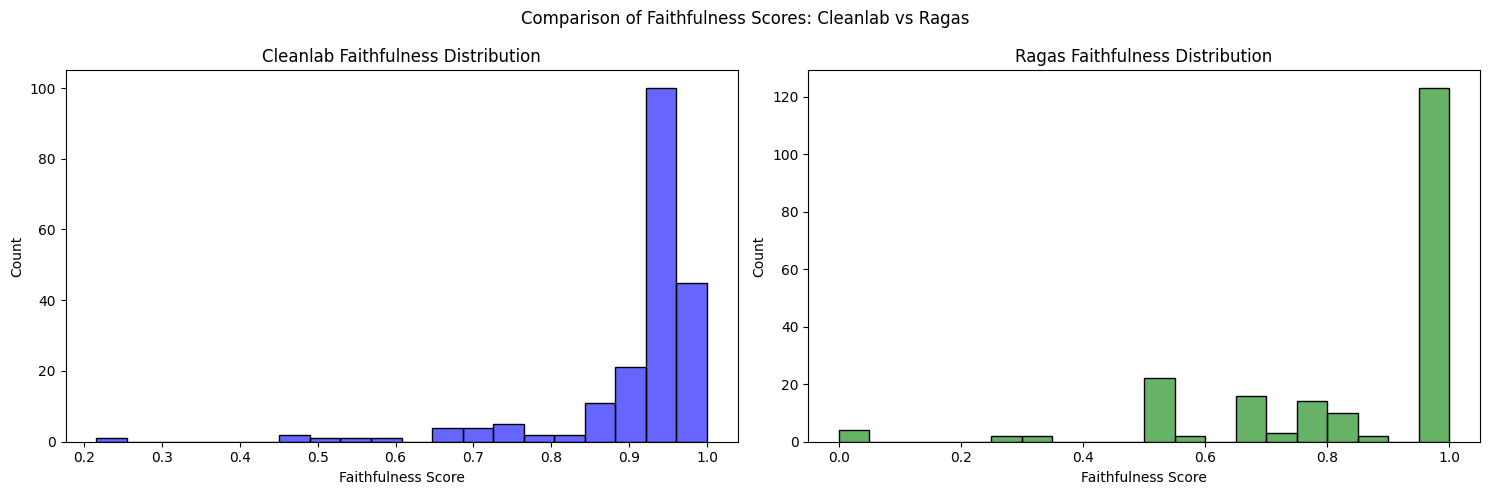

/tmp/ipykernel_1879843/224574998.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=['Cleanlab', 'Ragas'])


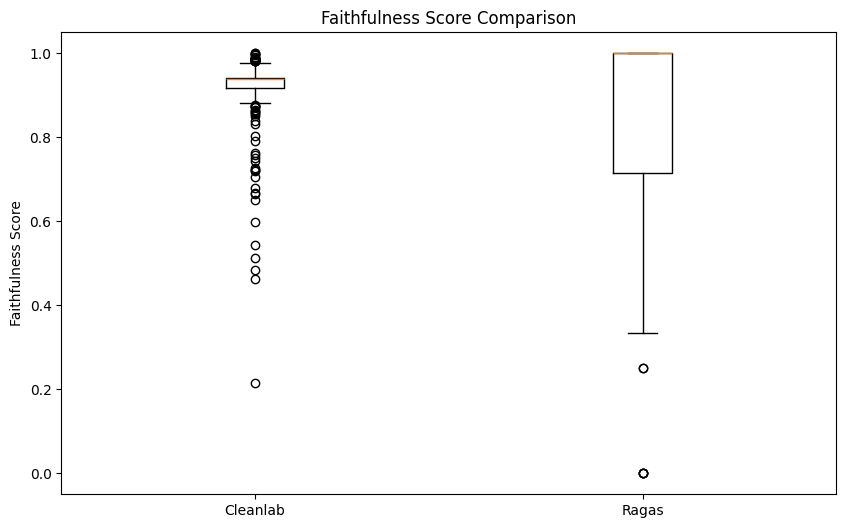

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram for Cleanlab
sns.histplot(data=df_cleanlab, x='trustworthiness_score', bins=20, ax=ax1, color='blue', alpha=0.6)
ax1.set_title('Cleanlab Faithfulness Distribution')
ax1.set_xlabel('Faithfulness Score')
ax1.set_ylabel('Count')

# Plot histogram for Ragas
sns.histplot(data=df_ragas, x='faithfulness', bins=20, ax=ax2, color='green', alpha=0.6)
ax2.set_title('Ragas Faithfulness Distribution')
ax2.set_xlabel('Faithfulness Score')
ax2.set_ylabel('Count')

# Add overall title
plt.suptitle('Comparison of Faithfulness Scores: Cleanlab vs Ragas')

# Print summary statistics
print("Cleanlab Faithfulness Stats:")
print(df_cleanlab['trustworthiness_score'].describe())
print("\nRagas Faithfulness Stats:")
print(df_ragas['faithfulness'].describe())

plt.tight_layout()
plt.show()

# Optional: Create a box plot for direct comparison
plt.figure(figsize=(10, 6))
box_data = [df_cleanlab['trustworthiness_score'], df_ragas['faithfulness']]
plt.boxplot(box_data, labels=['Cleanlab', 'Ragas'])
plt.title('Faithfulness Score Comparison')
plt.ylabel('Faithfulness Score')
plt.show()